In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist, euclidean
from fastdtw import fastdtw

In [ ]:
baseload = pd.read_csv('./data/Fluvius load profiles type 1 consumer/Type1consumerLoad3.csv', header=None)
baseload.columns = range(1, baseload.shape[1] + 1)
baseload.index = range(1, len(baseload) + 1)
solargen = pd.read_excel('./data/Belgium_solar_generation_probability_density.xlsx', sheet_name='Solar_profiles',header=None)
solargen = solargen.drop(index=0, columns=0).reset_index(drop=True)
solargen.index = range(1, len(solargen) + 1)
solargen = solargen.iloc[:, :-1]

Euclidean distance

C:\Users\fiasa\AppData\Local\Temp\ipykernel_25268\3540114728.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend(title='kWp')
C:\Users\fiasa\AppData\Local\Temp\ipykernel_25268\3540114728.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend(title='kWp')


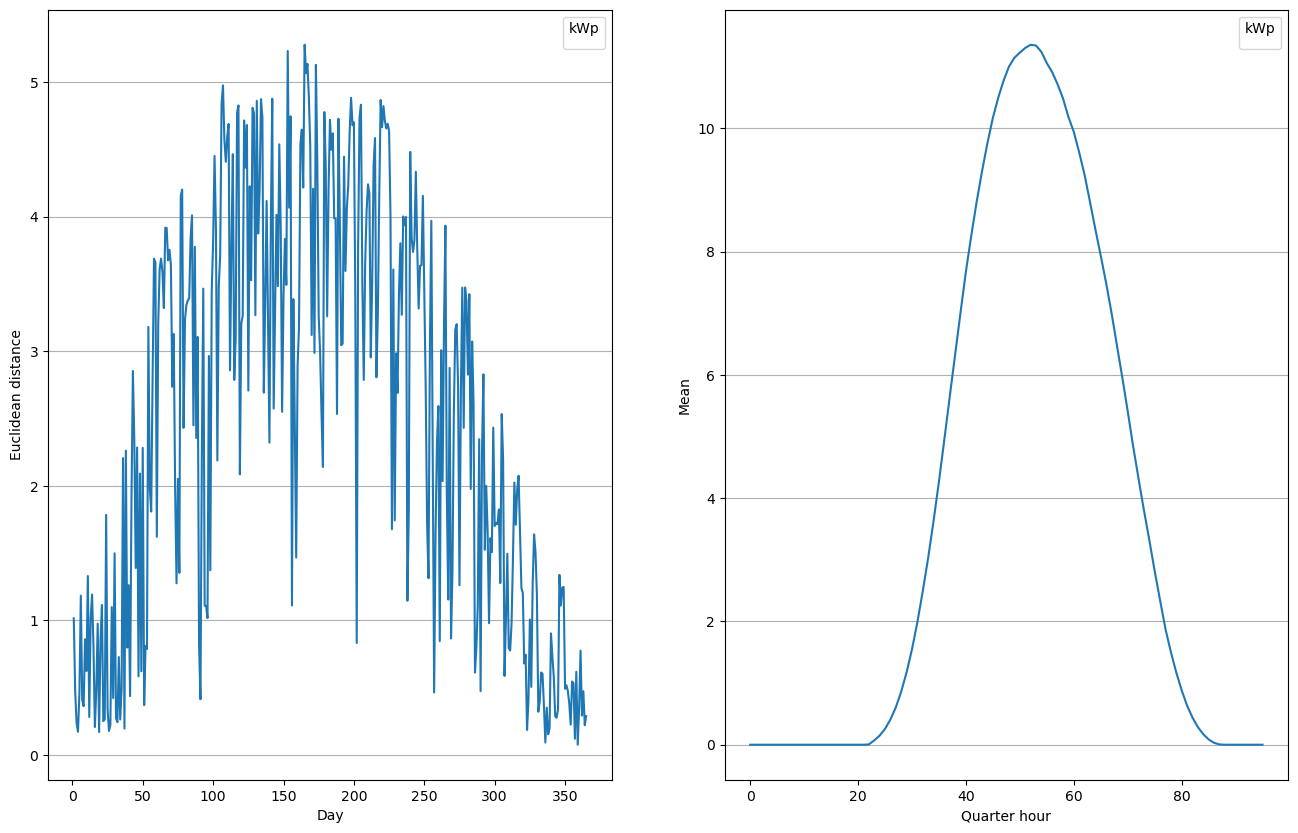

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [2]:
net_consumption = baseload - solargen

column_distances = {col: euclidean(baseload[col], net_consumption[col]) for col in baseload.columns}
column_distances = pd.Series(column_distances)

row_distances = cdist(baseload, net_consumption, metric='euclidean').diagonal()
row_distances = pd.Series(row_distances)

fig, axs = plt.subplots(1, 2, figsize=(16, 10))
plt.figure(figsize=(10, 6))

axs[0].plot(column_distances)
axs[0].set_xlabel('Day')
axs[0].set_ylabel('Euclidean distance')
axs[0].legend(title='kWp')
axs[0].grid(axis='y')

plt.figure(figsize=(10, 6))

axs[1].plot(row_distances)
axs[1].set_xlabel('Quarter hour')
axs[1].set_ylabel('Mean')
axs[1].legend(title='kWp') 
axs[1].grid(axis='y')

plt.show()


kWp sensitivity

In [3]:
kwp_values = np.arange(0, 11, 1)  # From 0 to 10 kWp, incrementing by 1

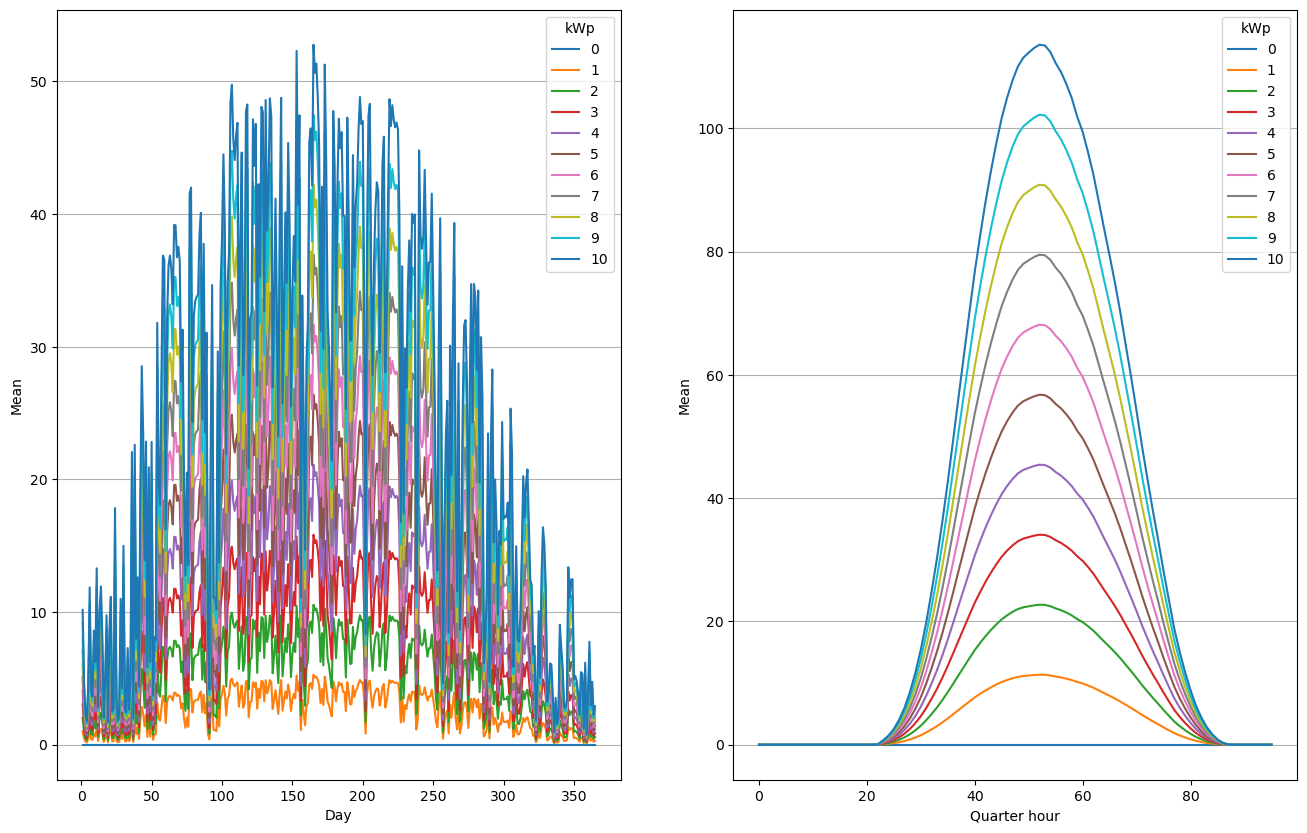

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [4]:
results_year = pd.DataFrame()
results_day = pd.DataFrame()

# Calculate the net consumption and Euclidean distance for each kWp value
for kwp in kwp_values: 
    net_consumption = baseload - (kwp * solargen)

    column_distances = {col: euclidean(baseload[col], net_consumption[col]) for col in baseload.columns}
    column_distances = pd.Series(column_distances)

    row_distances = cdist(baseload, net_consumption, metric='euclidean').diagonal()
    row_distances = pd.Series(row_distances)
    
    results_year[len(results_year.columns)] = column_distances
    results_day[len(results_day.columns)] = row_distances

fig, axs = plt.subplots(1, 2, figsize=(16, 10))
plt.figure(figsize=(10, 6))
for kwp in results_year.columns:
    axs[0].plot(results_year.index, results_year[kwp], label=kwp)
axs[0].set_xlabel('Day')
axs[0].set_ylabel('Euclidean distance')
axs[0].legend(title='kWp')
axs[0].grid(axis='y')

plt.figure(figsize=(10, 6))
for kwp in results_day.columns:
    axs[1].plot(results_day.index, results_day[kwp], label=kwp)
axs[1].set_xlabel('Quarter hour')
axs[1].set_ylabel('Euclidean distance')
axs[1].legend(title='kWp') 
axs[1].grid(axis='y')

plt.show()

Dynamic time warping

In [14]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

results_year = pd.DataFrame()
results_day = pd.DataFrame()

# Calculate the net consumption and Euclidean distance for each kWp value
for kwp in kwp_values: 
    net_consumption = baseload - (kwp * solargen)

    column_distances = {col: dtw.distance(baseload[col].values, net_consumption[col]) for col in baseload.columns}
    column_distances = pd.Series(column_distances)
    print("DTW column", kwp)

    row_distances = [dtw.distance(baseload.iloc[i].values, net_consumption.iloc[i].values) for i in range(baseload.shape[0])]
    row_distances = pd.Series(row_distances)
    print("DTW row", kwp)

    results_year[len(results_year.columns)] = column_distances
    results_day[len(results_day.columns)] = row_distances

fig, axs = plt.subplots(1, 2, figsize=(16, 10))
plt.figure(figsize=(10, 6))
for kwp in results_year.columns:
    axs[0].plot(results_year.index, results_year[kwp], label=kwp)
axs[0].set_xlabel('Day')
axs[0].set_ylabel('DTW Distance')
axs[0].legend(title='kWp')
axs[0].grid(axis='y')

plt.figure(figsize=(10, 6))
for kwp in results_day.columns:
    axs[1].plot(results_day.index, results_day[kwp], label=kwp)
axs[1].set_xlabel('Quarter hour')
axs[1].set_ylabel('DTW Distance')
axs[1].legend(title='kWp') 
axs[1].grid(axis='y')

plt.show()


KeyError: 0